# Real Data

Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [137]:
###Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [138]:
# load dataimport pandas as pd
data = pd.read_csv("Housing_Price.csv")
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,SalePrice,Street,Condition1,Condition2,CentralAir,HeatingQC,LotShape,LandContour
0,1,60,8450,7,5,2003,2003,706,0,150,...,2,2008,208500,Pave,Norm,Norm,Y,Ex,Reg,Lvl
1,2,20,9600,6,8,1976,1976,978,0,284,...,5,2007,181500,Pave,Feedr,Norm,Y,Ex,Reg,Lvl
2,3,60,11250,7,5,2001,2002,486,0,434,...,9,2008,223500,Pave,Norm,Norm,Y,Ex,IR1,Lvl
3,4,70,9550,7,5,1915,1970,216,0,540,...,2,2006,140000,Pave,Norm,Norm,Y,Gd,IR1,Lvl
4,5,60,14260,8,5,2000,2000,655,0,490,...,12,2008,250000,Pave,Norm,Norm,Y,Ex,IR1,Lvl


which are categorical and which are numerical features?

In [139]:
# you can print and analyse the data type to say about categorical features
###Numerical features
num_cols = data._get_numeric_data().columns
print(num_cols)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [140]:
###Categorical features
categ_feat = list(set(data.columns)-set(num_cols))
print(categ_feat)

['Condition1', 'Condition2', 'Street', 'CentralAir', 'HeatingQC', 'LandContour', 'LotShape']


Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [141]:
def onehot_encoding(data, columns):
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    
    for col in columns:
        one_hot_vec = pd.get_dummies(data[col])
        data[one_hot_vec.columns] = one_hot_vec
        
    data.drop(axis=1,columns=columns,inplace=True)
    return data

In [142]:
encoded_data = onehot_encoding(data, categ_feat)
encoded_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Po,TA,Bnk,HLS,Low,Lvl,IR1,IR2,IR3,Reg
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,0,1,0,0,0,1
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,1,0,0,0,1
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,0,1,1,0,0,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,0,1,1,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,0,1,1,0,0,0


Seperate the Label from the data, here it is 'SalePrice'

In [143]:
# Write your code here
sale_label = encoded_data['SalePrice']
encoded_data.drop(['SalePrice'],axis=1,inplace=True)

In [144]:
# Visualize the changed dataframe
encoded_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Po,TA,Bnk,HLS,Low,Lvl,IR1,IR2,IR3,Reg
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,0,1,0,0,0,1
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,1,0,0,0,1
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,0,1,1,0,0,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,0,1,1,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,0,1,0,0,0,1
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,1,0,0,0,1,0,0,0,1
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,0,0,1,0,0,0,1
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,0,0,1,0,0,0,1


Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [151]:
# Split data here 
X_train, X_test, Y_train, Y_test = train_test_split(encoded_data, sale_label, test_size=0.2, random_state=42)

In [180]:
# import your Librariesfrom sklearn.preprocessing 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

In [170]:
# write your code here and plot lambda vs cross validation score
lamdas = np.logspace(-1, 3, 100)
error = []
for lamda in lamdas:
    reg = Lasso(lamda)
    cv_score = np.mean(cross_val_score(reg, X_train, Y_train, cv=5))
    error.append((1-cv_score)*100)

Text(0, 0.5, 'Error percentage')

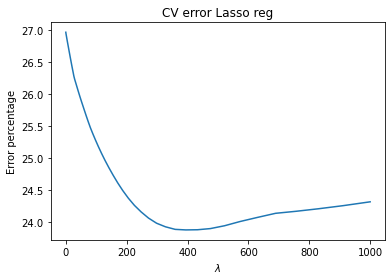

In [174]:
plt.plot(lamdas,error)
plt.title("CV error Lasso reg")
plt.xlabel(r"$\lambda$")
plt.ylabel("Error percentage")

$\lambda^{*} = 380,\;\;e^{*} = 23.8\%$

## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


In [176]:
# write your code here and plot lambda vs cross validation score
lamdas = np.logspace(-1, 2, 100)
error2 = []
for lamda in lamdas:
    reg2 = Ridge(lamda)
    cv_score = np.mean(cross_val_score(reg2, X_train, Y_train, cv=5))
    error2.append((1-cv_score)*100)

Text(0, 0.5, 'Error percentage')

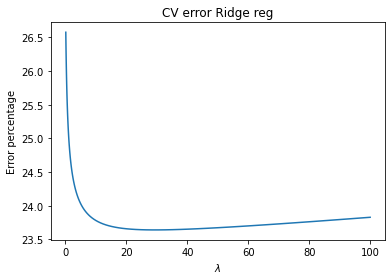

In [177]:
plt.plot(lamdas,error2)
plt.title("CV error Ridge reg")
plt.xlabel(r"$\lambda$")
plt.ylabel("Error percentage")

$\lambda^{*} = 25\;\;e^{*} = 23.7\%$ 

Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [186]:
# write your code here print cross validation score
reg3 = LinearRegression()
cv_score = np.mean(cross_val_score(reg3,X_train,Y_train,cv=5))
error = (1-cv_score)*100
print("CV score:",cv_score)
print("Error:",error)

CV score: 0.7300510296226127
Error: 26.99489703773873


Linear regression performs worse than the optimal case of both Lasso and Ridge

Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


In [187]:
# predict on test data which you  splitted earlier, print coefficients of the learned model, Mean square error. Report the model which gives the least MSE. Also commenton important features
lamda_ridge = 25
lamda_lasso = 380
reg_ridge = Ridge(alpha = lamda_ridge).fit(X_train, Y_train)
reg_lasso = Lasso(alpha = lamda_lasso).fit(X_train, Y_train)
reg_linear = LinearRegression().fit(X_train,Y_train)

In [195]:
y_pred_test_lasso = reg_lasso.predict(X_test)
y_pred_test_ridge = reg_ridge.predict(X_test)
y_pred_test_linear = reg_linear.predict(X_test)
mse_lasso = np.mean((Y_test-y_pred_test_lasso)**2)
mse_ridge = np.mean((Y_test-y_pred_test_ridge)**2)
mse_linear = np.mean((Y_test-y_pred_test_linear)**2)
print("MSE Lasso:",mse_lasso)
print("MSE Ridge:",mse_ridge)
print("MSE Linear:",mse_linear)

MSE Lasso: 1401222059.7457638
MSE Ridge: 1382086330.0141344
MSE Linear: 1390566901.8466089


Ridge model has least test error

In [198]:
print("Lasso coeff\n")
print(reg_lasso.coef_)
print("\n")
print("Ridge coeff\n")
print(reg_ridge.coef_)

Lasso coeff

[-2.23895851e+00 -1.79598185e+02  4.13917055e-01  1.86014472e+04
  3.33374713e+03  3.34730383e+02  1.83441350e+02  1.50436821e+01
  3.61788071e-01  2.65395498e+00  1.75310567e+00  4.31857375e+01
  4.21388391e+01  3.28569938e+01  5.50732401e+00  7.18370592e+03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -6.81317491e+03
 -0.00000000e+00  3.52767060e+03  3.48303520e+03  8.33318475e+03
  9.80599534e+00  2.80987444e+01 -3.12371539e+00  9.05012775e+00
  3.32269475e+01  6.90236857e+01 -3.52212977e+01 -1.05262045e+00
 -2.43020847e+02 -2.21902729e+02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  5.27226739e+03
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -4.61601045e+03  1.25749005e+04  0.00000000e+00 -0.00000000e+00
  5.21394268e+02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


Ridge coe

The coeffecients of Lasso are more sparse. Using this we can neglect features based on close to zero Lasso coeff

In [207]:
feat_extract = [elem for elem, check in zip(X_train.columns, reg_lasso.coef_) if check != 0]
print("Relevant features\n")
print(feat_extract)

Relevant features

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ex', 'Bnk', 'HLS', 'IR1']
